In [43]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# for pretty printing
np.set_printoptions(4, linewidth=100, suppress=True)

Suppose that we have a hypothetical dataset that is distributed as follows.


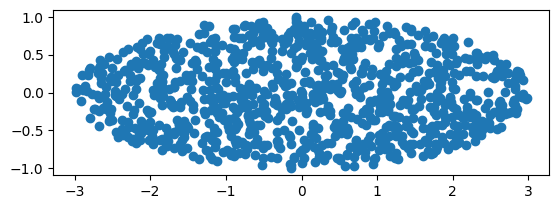

In [44]:
rng = np.random.RandomState(1)

# A trick to sample points uniformly over a unit disk
r = rng.rand(1000)
t = rng.rand(1000)
x = np.sqrt(r) * np.cos(2*np.pi*t)
y = np.sqrt(r) * np.sin(2*np.pi*t)

x = 3.0 * x  # now the points will be scattered over an ellipse.

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_aspect('equal')
plt.show()


If you actually open up the raw dataset, it would look something like this:

|          | $\ $ feature0 $\ $ | $\ $ feature1 $\ $ |
|:--------:|---------:|---------:|
|   data0  |  -0.8883 |  0.5739  |
|   data1  |   1.9601 |  -0.5417 |
|   data2  |   0.0003 |  -0.0107 |
| $\vdots$ | $\vdots$ | $\vdots$ |


In [45]:
print(x[:3], y[:3])

[-0.8883  1.9601  0.0003] [ 0.5739 -0.5417 -0.0107]


Now suppose we want to represent a data point with a single *scalar* value. (Consider this to be similar to using the average GPA as the single scalar value that best represents each of the students' overall academic achievement for the semester.)

It should not be too difficult to convince yourselves that, for the data points in this dataset, the scalar value that best represents each data point is its $x$-coordinate.



Using $x$-coordiante is, in other words, using the $0$th feature that the data has.

Like this, if we are using the features that already exists to represent data, we say we are doing **feature selection**.

On the other hand, suppose that we have a dataset that is distributed as follows.  

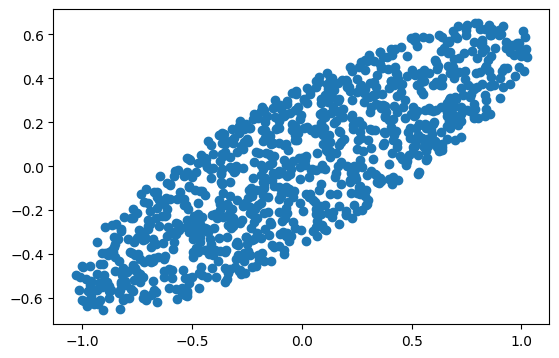

In [46]:
rng = np.random.RandomState(1)

# A trick to sample points uniformly over a unit disk
r = rng.rand(1000)
t = rng.rand(1000)
x = np.sqrt(r) * np.cos(2*np.pi*t)
y = np.sqrt(r) * np.sin(2*np.pi*t)

data = np.vstack((x, y))
A = rng.rand(2, 2)  # we multiply *A* to each of the data.
data = A @ data  # hence, the data points are now distorted.

x = data[0, :]
y = data[1, :]
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_aspect('equal')
plt.show()


It is visually intuitive that neither the $x$-coordinate nor the $y$-coordinate is the best scalar that represents the data.

One way, perhaps the most natural way, to  mathematically formulate our task of finding the scalar that best represent the data would be as follows:

>  Given data points $\mathbf{x}_i$, $i=1, \dots, n$, find a unit norm vector $\mathbf{w}$ and scalars $\alpha_i$ such that  $\mathbf{x}_i \approx \alpha_i \mathbf{w}$ for each $i$.

Then the scalar $\alpha_i$ becomes the (scalar) representation of $\mathbf{x}_i$.

 We only need the directional information from $\mathbf{w}$, so a unit norm vector is a natural choice.  



We have much studied linear algebra to write the expression "$\mathbf{x}_i \approx \alpha_i \mathbf{w}$ for each $i$" into a matrix notation

\begin{align*}
\mathbf{X} \approx \boldsymbol{\alpha} \mathbf{w}^\top
\end{align*}

where $\mathbf{X}$ is a matrix with row vectors $\mathbf{x}_1, \dots, \mathbf{x}_n$ and $\boldsymbol{\alpha} = (\alpha_1, \dots, \alpha_n)$.

The matrix $\boldsymbol{\alpha} \mathbf{v}^\top$ is of rank $1$.

We know that the best rank $1$ approximation of $\mathbf{X}$ is $\sigma_1 \mathbf{u}_1 \mathbf{v}_1^\top$ from the SVD of $\mathbf{X}$, so the best strategy will be to take $\boldsymbol{\alpha} = \sigma_1 \mathbf{u}_1$ and $\mathbf{w} = \mathbf{v}_1$.

* Notice the slight difference between last week and today. Last week, we took the left singular vectors $\mathbf{u}_i$ because we wanted to approximate the *range*, or the *column space*, of a given matrix. Today, we are taking
the right singular vector $\mathbf{v}_1$ because we want to approximate the *rows* themselves of a matrix: each row in $\mathbf{X}$ corresponds to a data point.

Moreover, we know that $\mathbf{X}\mathbf{v}_1 = \sigma_1 \mathbf{u}_1$. In other words, multiplying $\mathbf{v}_1$ on the right of $\mathbf{X}$ gives us the "coordinates" of the data points projected onto $\operatorname{span}\{\mathbf{v}_1\}$, but with respect to the basis $\{\mathbf{v}_1\}$.


In [47]:
X = data.T

U, S, Vt = np.linalg.svd(X)
w = Vt[0, :]
alpha = X @ w

approx = np.outer(alpha, w)
x_approx = approx[:, 0]
y_approx = approx[:, 1]

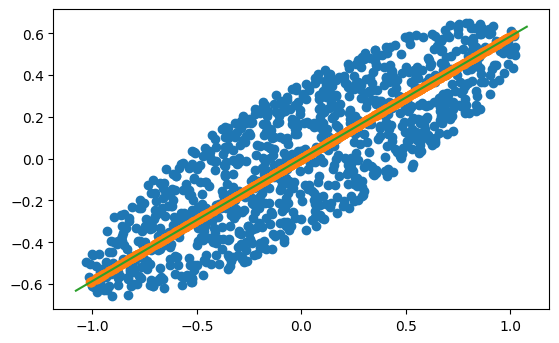

In [48]:
fig, ax = plt.subplots()
ax.scatter(x, y)  # raw data
ax.scatter(x_approx, y_approx)  # approximated data
ax.plot([-1.25*w[0], 1.25*w[0]], [-1.25*w[1], 1.25*w[1]], c='tab:green')
ax.set_aspect('equal')
plt.show()

Like this, if we are recreating the features from the existing ones according to our need, we say we are doing **feature extraction**.

----

What we have done until now can be easily transferred to high-dimensional setups.

Let us take a look at the celebrated **MNIST dataset**.

MNIST dataset is a dataset consisting of $28$ pixels $\times$ $28$ pixels grayscale images of handwritten digits.

Although the details how those images are stored differs from one setting to another, usually, each pixel corresponds to a real number between $0$ and $1$ denoting its brightness, where $0$ means completely black and $1$ means completely white.

Because each image contains $28\times 28 = 784$ pixels, we can store each image as a vector in $\mathbb{R}^{784}$.

In [49]:
### just some technical codes to execute for loading a public dataset

### details are not important for now, just observe that such a thing is also possible

import torch
from torchvision import datasets

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
)

dataset = np.array(test_data.data).reshape((-1, 28*28))[:1000,:] / 255
labels = np.array(test_data.targets)[:1000]


In [50]:
dataset.shape  # matrix of size (number of data) * (dimension of each data)

(1000, 784)

&nbsp;

Let us visualize the first image in the dataset.

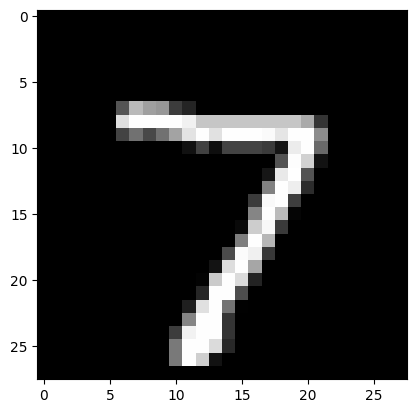

In [51]:
sample_img = dataset[0, :]
fig, ax = plt.subplots()

ax.imshow(sample_img.reshape(28, 28), cmap='gray')
# We first rearrange the entries of a 784-dim'l vector
# into a 28*28 array so that it looks like an image.
# If we don't set cmap then image is displayed in a yellow-blue theme

plt.show()

In [52]:
np.set_printoptions(2, linewidth=150, suppress=True)
print(sample_img.reshape(28, 28))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

&nbsp;

Actually the MNIST dataset bundle also contains the *label* information, which tells us what digit is written in each image.

In [53]:
labels[0]

7

&nbsp;

As we have a dataset, we want a grasp of how those data are distributed.

However, there is no way we can directly visualize vectors in $\mathbb{R}^{784}$.

&nbsp;

So, we will transform each vector in $\mathbb{R}^{784}$ into a two-dimensional vector so that those two-dimensional vectors best describe how the data are overall placed in the $784$-dimensional space.

The problem is very similar to the previous case:
>  Given data points $\mathbf{x}_i$, find unit norm vectors $\mathbf{w}_1, \mathbf{w}_2$ and scalars $\alpha_i, \beta_i$ such that  $\mathbf{x}_i \approx \alpha_i \mathbf{w}_1 + \beta_i \mathbf{w}_2$ for each $i$.

The vector $(\alpha_i, \beta_i)$ will be used as a two-dimensional representation of $\mathbf{x}_i$.

If $\mathbf{w}_1$ and $\mathbf{w}_2$ are moreover orthonormal, then they are, geometrically, "as independent as possible", so we can interpret it as extracting features so that the features are as distinctive as possible.

In matrix notation, what we want is
\begin{align*}
\mathbf{X} \approx \boldsymbol{\alpha}\mathbf{w}_1 ^\top + \boldsymbol{\beta} \mathbf{w}_2 ^\top = \left[\begin{array}{c|c}
     \boldsymbol{\alpha} &  \boldsymbol{\beta}  
\end{array}\right] \left[\begin{array}{c}
     \mathbf{w}_1 ^\top \\\hline  \mathbf{w}_2 ^\top   
\end{array}\right] .
\end{align*}

SVD tells us that $\sigma_1 \mathbf{u}_1 \mathbf{v}_1^\top + \sigma_2 \mathbf{u}_2 \mathbf{v}_2^\top$ is the best rank $2$ approximation of $\mathbf{X}$, so the optimal choices are $\boldsymbol{\alpha} = \sigma_1 \mathbf{u}_1$, $\boldsymbol{\beta} = \sigma_2 \mathbf{u}_2$, $\mathbf{w}_1 = \mathbf{v}_1$, and $\mathbf{w}_2 = \mathbf{v}_2$.

In [54]:
dataset -= np.mean(dataset, 0)
# we make the dataset centered at *0*, because otherwise,
# all vectors in the dataset have nonnegative entries,
# so the first right singular vector will always be in the
# direction where all components are positive - this is weird.

U, S, Vt = np.linalg.svd(dataset)

w1 = Vt[0, :]
w2 = Vt[1, :]
alpha = S[0] * U[:, 0]
beta = S[1] * U[:, 1]

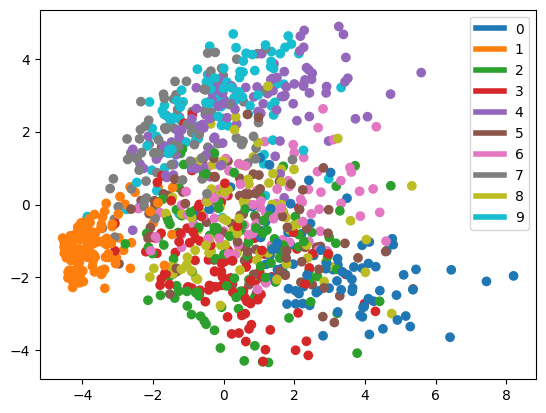

In [55]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", \
          "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]

fig, ax = plt.subplots()
ax.scatter(alpha, beta, c=[colors[label] for label in labels])

from matplotlib.lines import Line2D
custom_legends = [Line2D([0], [0], color=colors[i], lw=4) for i in range(10)]
ax.legend(custom_legends, [str(i) for i in range(10)])
plt.show()

The color of a marker denotes the label of the corresponding image.

Because the dimension is drastically reduced from $784$ into just $2$, it is expectable that the clusters are not very clearly distinguished.
However there are still some things that can be inferred from the plot: the orange cluster (images of $1$) is well separated from the other clusters, and the purple ($4$), gray ($7$), and cyan ($9$) clusters contain similar images.

&nbsp;

Using three-dimensional representations of the data makes the visualization of the clusters much more expressive, but now the visualization itself becomes more challenging.

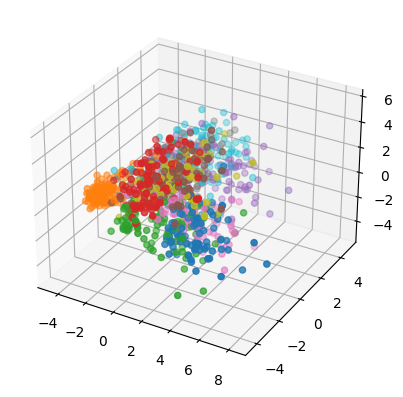

In [56]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

alpha = S[0] * U[:, 0]
beta = S[1] * U[:, 1]
gamma = S[2] * U[:, 2]

ax.scatter(alpha, beta, gamma, c=[colors[label] for label in labels])
plt.show()